In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)
library(BiocIO)
library(genomation)
library(Rsamtools)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    a

Import metadata

In [2]:
meta.data = read.csv("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240614/GM12878/cellranger_res/GM12878/outs/per_barcode_metrics.csv",
                     stringsAsFactors = F)
rownames(meta.data) = meta.data$barcode
dim(meta.data)
meta.data

[1] 715648     31

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,atac_raw_reads,atac_unmapped_reads,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACAGCCAAACAACA-1,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA-1,ACAGCGGGTGTGTTAC-1,0,0,12,7,0,5,0,⋯,1,1,0,0,0,0,0,0,0,0
AAACAGCCAAACATAG-1,AAACAGCCAAACATAG-1,AAACAGCCAAACATAG-1,ACAGCGGGTTGTTCTT-1,0,0,832,767,13,703,9,⋯,924,26,182,73,0,571,72,18,18,34
AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA-1,ACAGCGGGTAACAGGC-1,0,0,4,4,0,3,1,⋯,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAACCTAT-1,AAACAGCCAAACCTAT-1,AAACAGCCAAACCTAT-1,ACAGCGGGTGCGCGAA-1,0,0,4,4,0,4,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG-1,ACAGCGGGTCCTCCAT-1,0,2,7,4,0,3,1,⋯,2,0,0,1,0,0,1,0,0,0
AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA-1,ACAGCGGGTCATGGTT-1,0,0,5,5,0,5,0,⋯,5,0,0,3,0,0,2,1,1,2
AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,ACAGCGGGTAGGTGAC-1,0,0,3,3,0,3,0,⋯,1,0,0,0,0,0,1,0,1,2
AAACAGCCAAACTAAG-1,AAACAGCCAAACTAAG-1,AAACAGCCAAACTAAG-1,ACAGCGGGTTACCCAG-1,0,0,3,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAACTCAT-1,AAACAGCCAAACTCAT-1,AAACAGCCAAACTCAT-1,ACAGCGGGTCAGTGCC-1,0,0,7,6,0,6,0,⋯,0,0,0,0,0,0,0,0,0,0


Quality control

In [3]:
table(meta.data$is_cell)


     0      1 
712108   3540 

In [4]:
bc.qc = meta.data[meta.data$is_cell == 1,"barcode"]

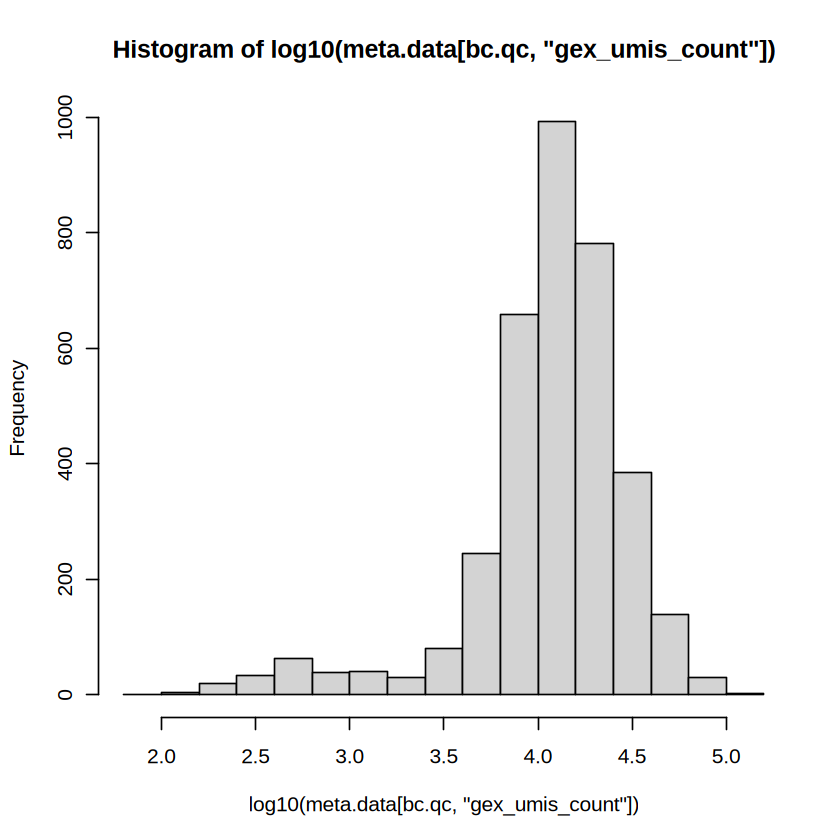

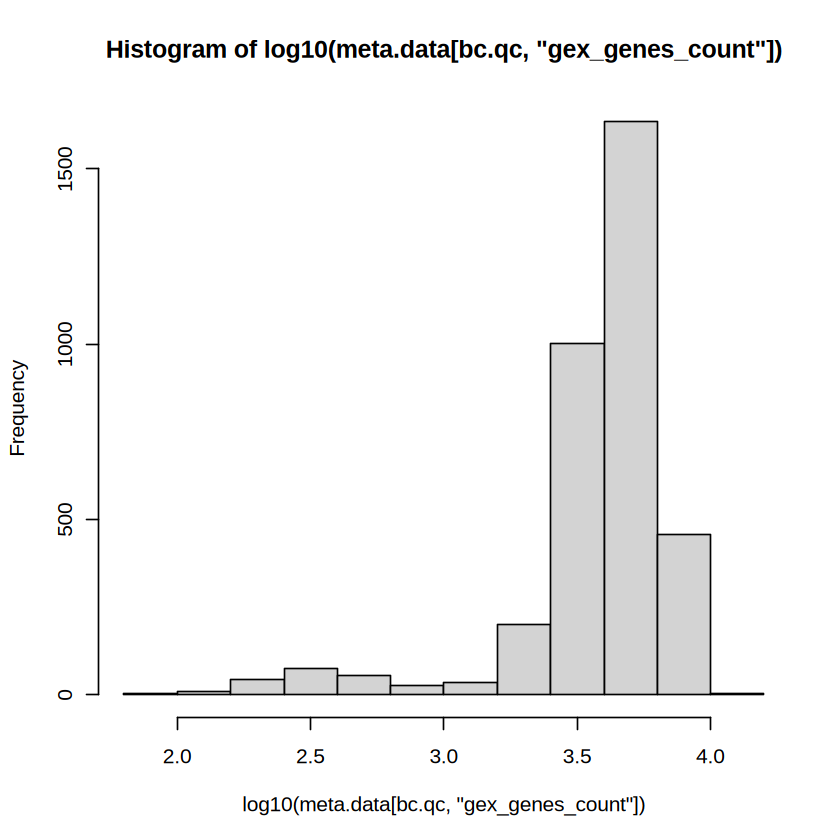

In [5]:
hist(log10(meta.data[bc.qc,"gex_umis_count"]))
hist(log10(meta.data[bc.qc,"gex_genes_count"]))

In [6]:
bc.qc.gex_filter = bc.qc[log10(meta.data[bc.qc,"gex_umis_count"]) > 3.6]

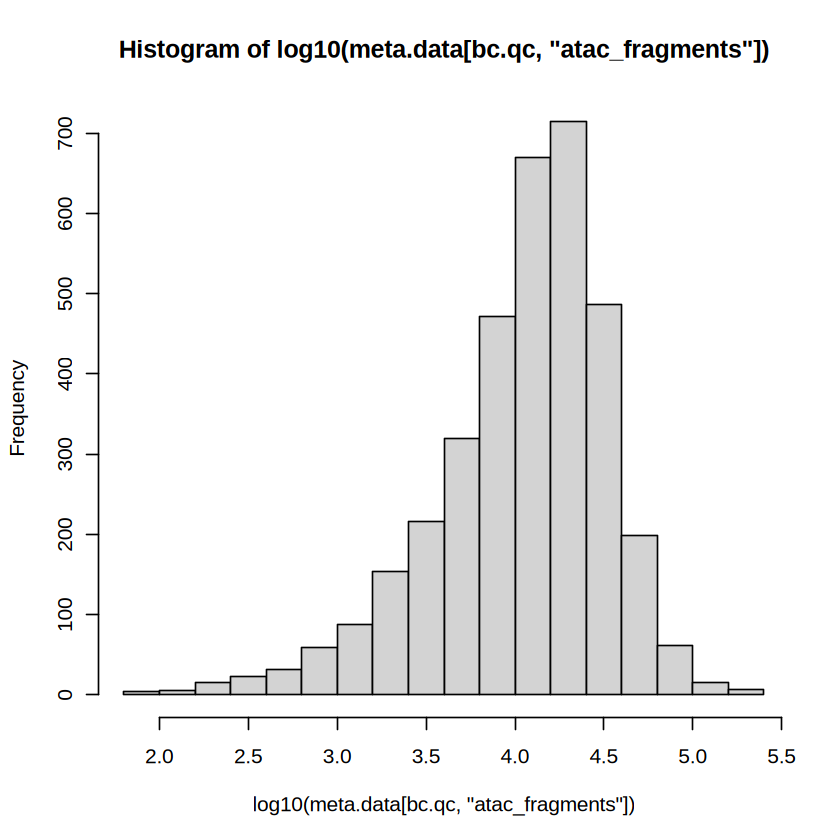

In [7]:
hist(log10(meta.data[bc.qc,"atac_fragments"]))

In [8]:
bc.qc.atac_filter = bc.qc[log10(meta.data[bc.qc,"atac_fragments"]) > 3]

In [9]:
bc.qc.gex_atac_filter = intersect(bc.qc.gex_filter,
                                  bc.qc.atac_filter)

In [10]:
meta.data.qc = meta.data[bc.qc.gex_atac_filter,]
meta.data.qc$sample = "GM12878"
meta.data.qc$sample_barcode = paste(meta.data.qc$sample,
                                    meta.data.qc$barcode,
                                    sep = "_")
rownames(meta.data.qc) = meta.data.qc$sample_barcode
meta.data.qc

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,⋯,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites,sample,sample_barcode
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
GM12878_AAACAGCCACTAAGAA-1,AAACAGCCACTAAGAA-1,AAACAGCCACTAAGAA-1,ACAGCGGGTGTCACGC-1,1,0,34778,32690,826,16950,13148,⋯,1485,8946,16,379,11777,5318,7354,13975,GM12878,GM12878_AAACAGCCACTAAGAA-1
GM12878_AAACAGCCATAATCAC-1,AAACAGCCATAATCAC-1,AAACAGCCATAATCAC-1,ACAGCGGGTAGGAGGA-1,1,0,21150,19982,498,7164,11270,⋯,1942,7925,21,1627,10113,4435,6524,12452,GM12878,GM12878_AAACAGCCATAATCAC-1
GM12878_AAACATGCACTTGTTC-1,AAACATGCACTTGTTC-1,AAACATGCACTTGTTC-1,CATTTAGGTGGTTACT-1,1,0,108977,103397,3173,49966,44920,⋯,4127,26925,22,313,32580,10400,17549,33046,GM12878,GM12878_AAACATGCACTTGTTC-1
GM12878_AAACATGCATAATCAC-1,AAACATGCATAATCAC-1,AAACATGCATAATCAC-1,CATTTAGGTAGGAGGA-1,1,0,60550,57076,1884,24359,28000,⋯,427,2360,1,38,2979,1327,1865,3556,GM12878,GM12878_AAACATGCATAATCAC-1
GM12878_AAACCAACATTAGCGC-1,AAACCAACATTAGCGC-1,AAACCAACATTAGCGC-1,CTTTATCGTACTGATC-1,1,0,38700,36669,1241,16914,16762,⋯,561,2654,4,450,3614,1715,2571,4923,GM12878,GM12878_AAACCAACATTAGCGC-1
GM12878_AAACCGAAGCAAGGAC-1,AAACCGAAGCAAGGAC-1,AAACCGAAGCAAGGAC-1,TGACTATTCGCGAAAT-1,1,0,29623,27948,882,12904,12717,⋯,2477,15310,12,225,20651,8208,11125,21113,GM12878,GM12878_AAACCGAAGCAAGGAC-1
GM12878_AAACCGCGTAACTACG-1,AAACCGCGTAACTACG-1,AAACCGCGTAACTACG-1,AATAGCTCAGCTCGAG-1,1,0,109408,103820,3178,59402,35390,⋯,2591,14213,29,1235,19056,9509,13671,26193,GM12878,GM12878_AAACCGCGTAACTACG-1
GM12878_AAACCGGCAGTAAGTA-1,AAACCGGCAGTAAGTA-1,AAACCGGCAGTAAGTA-1,ATTGACCGTGAACCGG-1,1,0,20720,19554,526,10737,7159,⋯,541,2949,5,236,3886,1946,2587,4943,GM12878,GM12878_AAACCGGCAGTAAGTA-1
GM12878_AAACCGGCATTAAACC-1,AAACCGGCATTAAACC-1,AAACCGGCATTAAACC-1,ATTGACCGTTATGTCA-1,1,0,56934,54009,1984,28096,20670,⋯,1510,8861,25,916,12272,5169,7419,13995,GM12878,GM12878_AAACCGGCATTAAACC-1


Import RNA and RNA count matrix

In [11]:
matrix.tmp = Read10X(data.dir = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240614/GM12878/cellranger_res/GM12878/outs/raw_feature_bc_matrix/")
matrix.tmp$`Gene Expression` = matrix.tmp$`Gene Expression`[,meta.data.qc$barcode]
matrix.tmp$Peaks = matrix.tmp$Peaks[,meta.data.qc$barcode]

colnames(matrix.tmp$`Gene Expression`) =
  meta.data.qc$sample_barcode
colnames(matrix.tmp$Peaks) =
  meta.data.qc$sample_barcode

10X data contains more than one type and is being returned as a list containing matrices of each type.



Create fragment object

In [12]:
list.fragments = list()
cells.tmp = meta.data.qc$barcode
names(cells.tmp) = meta.data.qc$sample_barcode
list.fragments[[1]] =
  CreateFragmentObject(path = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240614/GM12878/cellranger_res/GM12878/outs/atac_fragments.tsv.gz",
                       cells = cells.tmp)

Computing hash



Import geneome annotation

In [13]:
annotation.gtf <- import("/maps/projects/ralab/data/genome/hg38/cellranger_arc/refdata-cellranger-arc-GRCh38-NNFC-2.0.2/genes/genes.gtf.gz", format = "gtf")
mcols(annotation.gtf) = mcols(annotation.gtf)[,c("transcript_id","gene_name","gene_id","gene_type","type")]
colnames(mcols(annotation.gtf)) = c("tx_id", "gene_name", "gene_id", "gene_biotype", "type")

Create seurat object

In [14]:
obj.seurat <- CreateSeuratObject(
  counts = matrix.tmp$`Gene Expression`,
  assay = "RNA",
  meta.data = meta.data.qc
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [15]:
obj.seurat[["Peaks"]] <- CreateChromatinAssay(
  counts = matrix.tmp$Peaks,
  fragments = list.fragments,
  annotation = annotation.gtf,
  sep = c(":", "-")
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
obj.seurat

An object of class Seurat 
198306 features across 3103 samples within 2 assays 
Active assay: RNA (62757 features, 0 variable features)
 1 layer present: counts
 1 other assay present: Peaks

Check ATAC quality

In [17]:
DefaultAssay(obj.seurat) <- "Peaks"
obj.seurat <- NucleosomeSignal(obj.seurat)
obj.seurat <- TSSEnrichment(obj.seurat)

Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



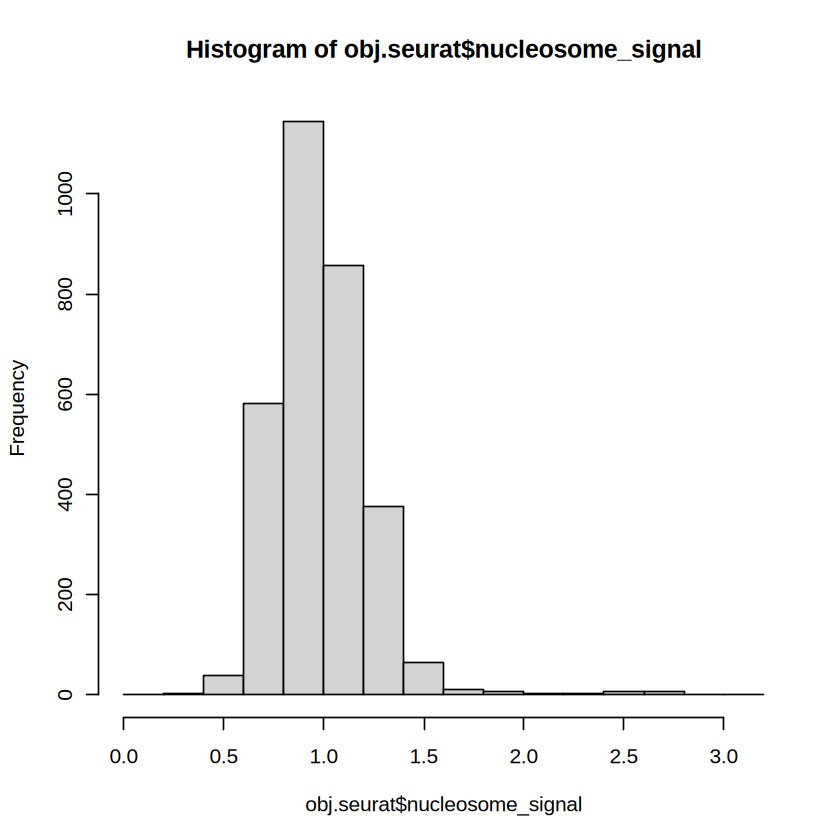

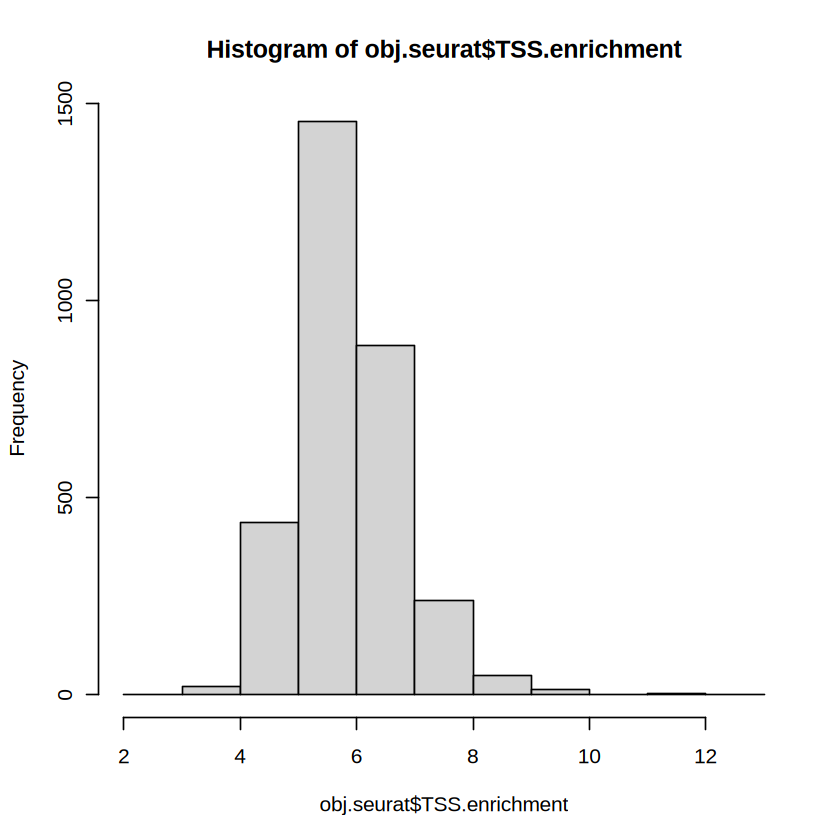

In [18]:
hist(obj.seurat$nucleosome_signal)
hist(obj.seurat$TSS.enrichment)

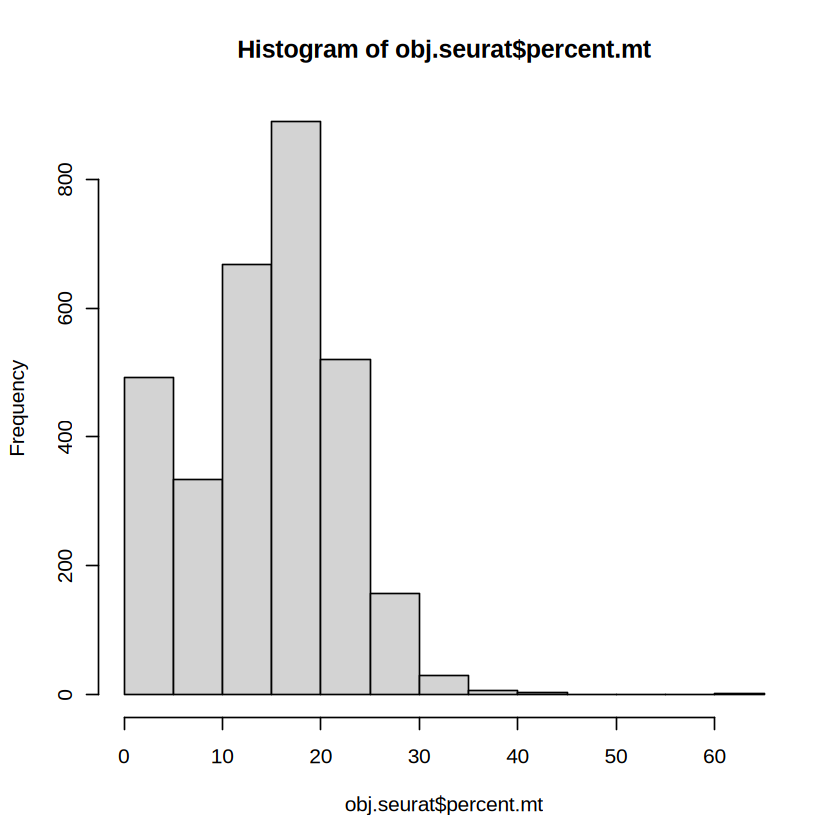

In [19]:
DefaultAssay(obj.seurat) <- 'RNA'
obj.seurat[["percent.mt"]] <- PercentageFeatureSet(obj.seurat, pattern = "^MT-")
hist(obj.seurat$percent.mt)

Filter out low quality cells

In [20]:
obj.seurat.qc = 
  subset(obj.seurat,
         subset = nucleosome_signal < 2 &
                  TSS.enrichment > 3 &
                  percent.mt < 30)
obj.seurat.qc

An object of class Seurat 
198306 features across 3050 samples within 2 assays 
Active assay: RNA (62757 features, 0 variable features)
 1 layer present: counts
 1 other assay present: Peaks

Plot RNA UMAP

In [21]:
DefaultAssay(obj.seurat.qc) <- "RNA"
obj.seurat.qc <- obj.seurat.qc %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30) %>%
  FindNeighbors(dims = 1:30) %>%
  FindClusters()

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  GPC5, CACNA1E, MIR3681HG, NRXN3, ZC3H12C, ENSG00000285744, MIR155HG, ENSG00000253125, ENSG00000222042, LINC00158 
	   MCOLN2, LINC01340, PLEKHG1, HIVEP3, TNFAIP3, CD44, RFTN1, ADARB2, ENSG00000251088, SLAMF1 
	   KIAA1217, NRG2, TRAF1, ENSG00000249738, NOL4L, TRAF3, EBI3, PLD1, L3MBTL4, BIRC3 
Negative:  IGHM, IGLC2, HSP90B1, HSPA5, IGLC3, ITGA4, JCHAIN, DENND5B, IGHV3-23, TNFRSF17 
	   GPR15, MZB1, XBP1, CD38, CALR, MANF, CLEC2D, SETBP1, LAMP5, COL24A1 
	   PRDM1, ATXN1, IGLV6-57, MACROD2, SDF2L1, ENSG00000285417, EIF2AK3, TXNDC11, ITGAL, EVI2B 
PC_ 2 
Positive:  DIAPH3, MKI67, POLQ, ASPM, SMC4, TOP2A, BUB1B, CENPE, KIF14, CENPF 
	   CIT, KNL1, KIF18B, STIL, NCAPG, MELK, KIF20B, DEPDC1B, DLGAP5, LINC01572 
	   TPX2, RRM2, ECT2, C21orf58, CDCA2, KIF11, GTSE1, NUF2, KIF15, ENSG00000227598 
Negative:  FNDC3B, NEAT1, LINC02384, ATOSA, SNX29, ZDHHC14, IFNG-AS1, JCHAIN

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3050
Number of edges: 116769

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7626
Number of communities: 10
Elapsed time: 0 seconds


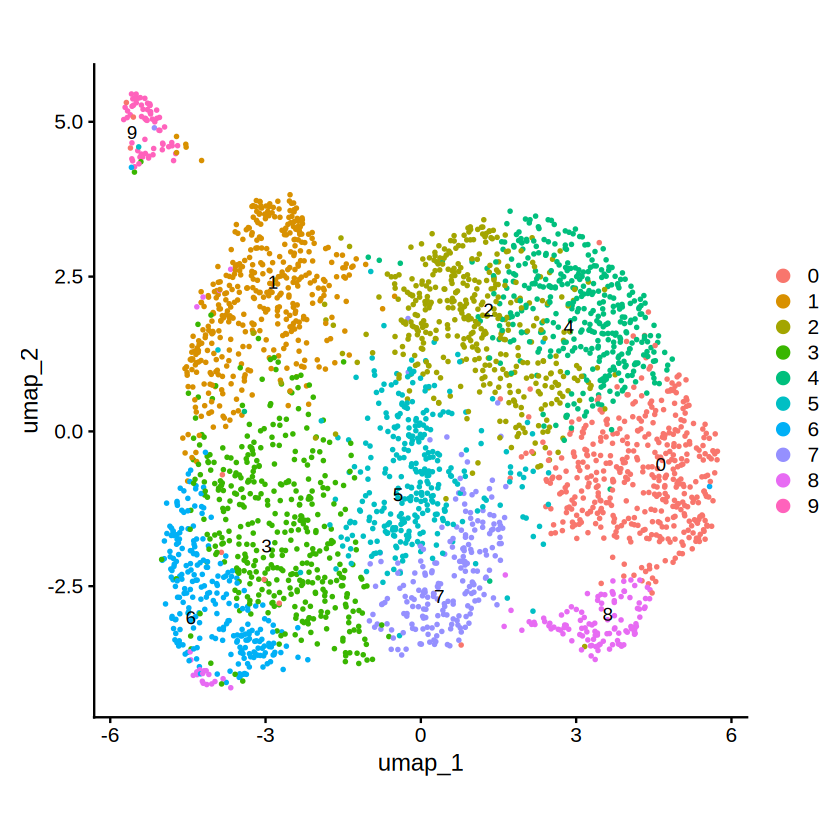

In [22]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

Plot ATAC UMAP

In [23]:
DefaultAssay(obj.seurat.qc) <- "Peaks"
obj.seurat.qc <- obj.seurat.qc %>%
  RunTFIDF() %>%
  FindTopFeatures(min.cutoff = 'q0') %>%
  RunSVD() %>%
  RunUMAP(reduction = 'lsi', dims = 2:30) %>%
  FindNeighbors(reduction = 'lsi', dims = 2:30) %>%
  FindClusters(verbose = FALSE, algorithm = 3)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

13:58:47 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:58:47 Read 3050 rows and found 29 numeric columns

13:58:47 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:58:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:58:47 Writing NN index file to temp file /tmp/Rtmp2044Zl/file1b09543de55e76

13:58:47 Searching Annoy index using 1 thread, search_k = 3000

13:58:48 Annoy recall = 100%

13:58:50 Commencing smooth kNN distance calibration using 1 thread
 with tar

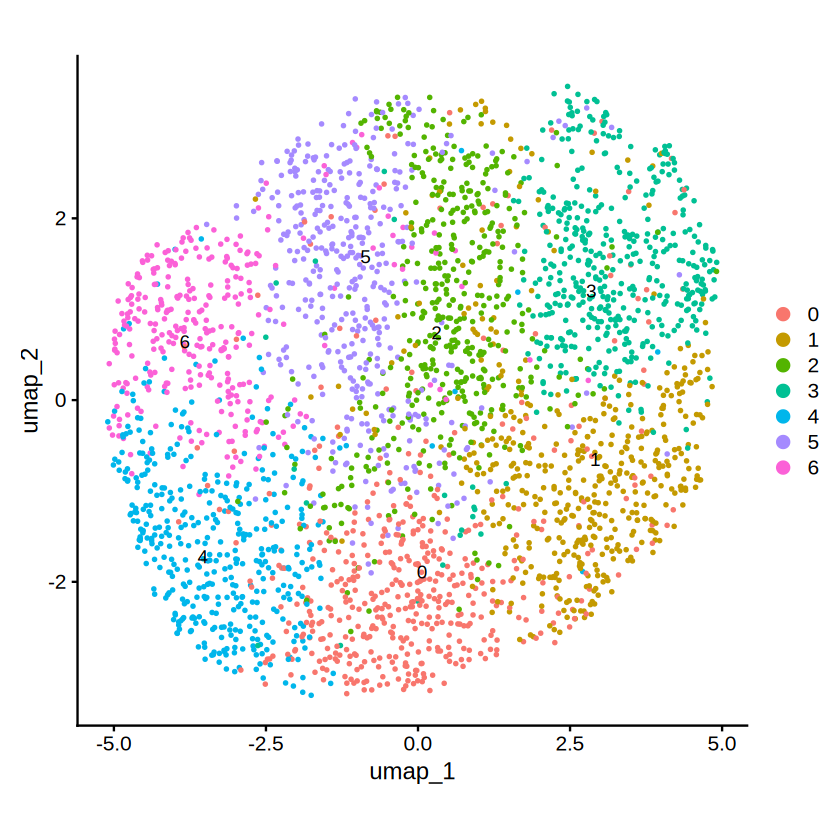

In [24]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

Output fragment file for cells passing qc

In [25]:
atac_fragments = read.delim("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/10x_multiome_240614/GM12878/cellranger_res/GM12878/outs/atac_fragments.tsv.gz",
                            header = F,
                            comment.char = "#")

In [26]:
atac_fragments.filter = 
  atac_fragments[atac_fragments$V4 %in% obj.seurat.qc$barcode,]
atac_fragments.filter = 
  atac_fragments.filter[atac_fragments.filter$V1 %in% paste("chr",c(1:22,"X","Y"), sep = ""),]
atac_fragments.filter[,4] = paste("GM12878",atac_fragments.filter[,4],sep = "_")
atac_fragments.filter

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<int>
2,chr1,10091,10253,GM12878_AACCTTAAGGCTGTCA-1,1
3,chr1,10151,10180,GM12878_CGCTTCTAGCATCCAG-1,2
4,chr1,10151,10191,GM12878_GTTCGCGCAGCCGCTA-1,1
5,chr1,10157,10191,GM12878_GATGGACAGGAACACA-1,1
6,chr1,10157,10192,GM12878_CCAGGATGTGAGGTAG-1,1
7,chr1,10169,10273,GM12878_AAGCCACGTTGTTGGA-1,1
8,chr1,16205,16272,GM12878_TCATAACCATGAGCAG-1,3
9,chr1,16215,16248,GM12878_CTTAACAAGCCTTAAA-1,1
10,chr1,16215,16248,GM12878_TTTGCATTCAATGAGG-1,1


In [34]:
write.table(atac_fragments.filter,
            "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv",
            col.names = F,
            row.names = F,
            quote = F,
            sep = "\t")
bgzip("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv",
      "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv.gz",
     overwrite = T)


indexTabix("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv.gz",
           format = "bed")

system("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv")

[1] "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv.gz"

[1] "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/atac_fragments.tsv.gz.tbi"

Output RNA count matrix file for cells passing qc

In [35]:
write.csv(as.data.frame(obj.seurat.qc@assays$RNA$count),
          gzfile("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/rna_count_matrix.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


In [27]:
write.csv(t(as.data.frame(obj.seurat.qc@assays$RNA$count)),
          gzfile("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/rna_count_matrix.t.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


Save obj.seurat.qc

In [28]:
saveRDS(obj.seurat.qc,
         "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/obj.seurat.qc.rds")

In [32]:
obj.seurat.qc

An object of class Seurat 
198306 features across 3050 samples within 2 assays 
Active assay: Peaks (135549 features, 135549 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, lsi

In [29]:
summary(obj.seurat.qc$gex_umis_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3992    9604   14078   17407   21304  107946 

In [30]:
summary(obj.seurat.qc$atac_fragments)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1002    7242   14137   18234   23861  221066 

In [36]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Rsamtools_2.18.0     Biostrings_2.70.1    XVector_0.42.0      
 [4] GenomicRanges_1.54.1 GenomeInfoDb_1.38.1  IRanges_2.36.0      

In [1]:
atac_matrix = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240617/sc-E2G/test/results/GM12878/GM12878.multiome_7features/Kendall/atac_matrix.rds")

In [2]:
data.table::fwrite(as.data.frame(as.matrix(atac_matrix)),
                   "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/matrix.atac.csv.gz",
                   row.names = T)

Loading required package: Matrix

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.5 GiB”
